In [4]:
# Imports das libs
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [5]:
# Obtendo dataset Minist
# Ja no Keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

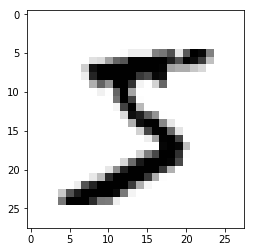

In [6]:
# Numtendi nada!
# Bora ver com matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [7]:
# No modelo normal, transformamos a imagem 2d em um vetor 28*28 = 784
#x_train = x_train.reshape(60000, 784)
#x_test = x_test.reshape(10000, 784)

#O modelo convolucional entra com a imagem 2D mesmo
#o dataset tem cada dígito 28x28
img_rows = 28
img_cols = 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
print(x_train[0])

#Normalizando para valores entre 0 e 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train[0])

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]


In [8]:
# Vamos ajustar o formato da saida
num_classes = 10
# O dataset tem como saida os labels
print(y_train[0])
# Convertendo para um vetor de saida com 10 dimensoes
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [25]:
# O exemplo anterior
#model = Sequential()
#model.add(Dense(200, activation='relu', input_shape=(784,)))
#model.add(Dropout(0.2))
#model.add(Dense(200, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(num_classes, activation='softmax'))

# Modelo Convolucional

model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(40, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(40, kernel_size=(3,3), activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 20)        200       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 20)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 40)        7240      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 40)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 40)          14440     
_________________________________________________________________
dropout_6 (Dropout)          (None, 3, 3, 40)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 360)               0         
__________

In [26]:
otimizador = keras.optimizers.Adam(lr = 0.001, decay = 0.0001, clipvalue = 0.5)
model.compile(loss='categorical_crossentropy',
                  optimizer=otimizador,
                  metrics=['accuracy'])

In [27]:
# Treina com os parte dos dados
batch_size = 64
epochs = 10

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 27s 447us/step - loss: 0.3714 - acc: 0.8802 - val_loss: 0.0666 - val_acc: 0.9802
Epoch 2/10
60000/60000 [==============================] - 26s 430us/step - loss: 0.1072 - acc: 0.9697 - val_loss: 0.0455 - val_acc: 0.9858
Epoch 3/10
60000/60000 [==============================] - 24s 393us/step - loss: 0.0812 - acc: 0.9768 - val_loss: 0.0354 - val_acc: 0.9894
Epoch 4/10
60000/60000 [==============================] - 24s 406us/step - loss: 0.0647 - acc: 0.9820 - val_loss: 0.0339 - val_acc: 0.9898
Epoch 5/10
60000/60000 [==============================] - 26s 440us/step - loss: 0.0565 - acc: 0.9838 - val_loss: 0.0273 - val_acc: 0.9909
Epoch 6/10
60000/60000 [==============================] - 26s 440us/step - loss: 0.0473 - acc: 0.9862 - val_loss: 0.0305 - val_acc: 0.9906
Epoch 7/10
60000/60000 [==============================] - 26s 440us/step - loss: 0.0411 - acc: 0.9881 - val_loss: 0.

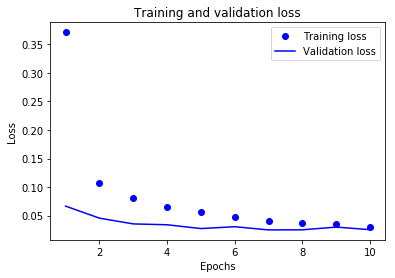

In [28]:
#Vamos ver como foi o treino?
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, epochs + 1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

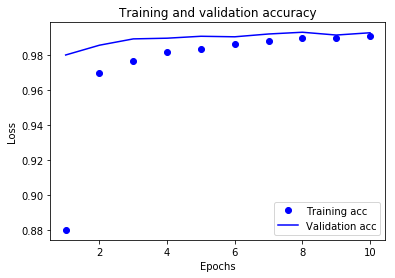

In [29]:
#Como a acuracia evoluiu?
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
# Testa
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.025347159878202727
Test accuracy: 0.9929


In [12]:
# Testando uma entrada qualquer
print(y_train[10])
print(model.predict(x_train[10].reshape((1,28,28,1))))
print(model.predict_classes(x_train[10].reshape((1,28,28,1))))

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[[5.46317115e-12 1.20496153e-07 7.88567007e-08 9.99991655e-01
  4.36740599e-09 5.33921411e-06 6.70758262e-13 4.96455677e-09
  1.05884785e-08 2.73248634e-06]]
[3]


In [13]:
# Vendo alguns reports
# Usando sklearn
from sklearn.metrics import classification_report, confusion_matrix

# Classificando toda base de teste
y_pred = model.predict_classes(x_test)
# voltando pro formato de classes
import numpy as np
y_test_c = np.argmax(y_test, axis=1)

print('Confusion Matrix')
print(confusion_matrix(y_test_c, y_pred))
print('Classification Report')
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(classification_report(y_test_c, y_pred, target_names=target_names))

Confusion Matrix
[[ 976    1    0    0    0    0    1    0    1    1]
 [   0 1133    1    1    0    0    0    0    0    0]
 [   1    0 1027    0    0    0    0    4    0    0]
 [   0    0    3 1003    0    1    0    2    1    0]
 [   1    1    0    0  971    0    3    0    0    6]
 [   0    0    0    5    0  884    2    0    0    1]
 [   6    3    0    0    1    4  943    0    1    0]
 [   0    5   11    1    0    1    0 1007    1    2]
 [   4    0    4    1    2    1    0    2  957    3]
 [   3    2    0    1    3    2    0    2    1  995]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       9

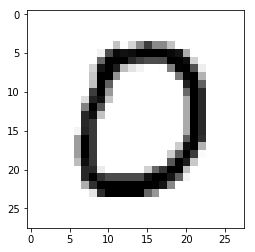

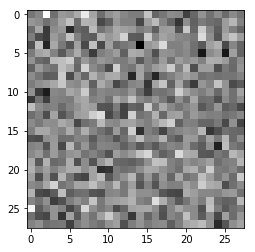

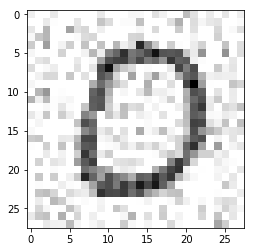

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Test loss: 0.0457943769481848
Test accuracy: 0.9862


In [18]:
#introduzindo ruido

#Lendo novamente
(xtr,ytr ), (x_te,y_te) = mnist.load_data()
x_te = x_te.reshape(x_te.shape[0], img_rows, img_cols, 1)

plt.imshow(x_te.reshape(x_te.shape[0], img_rows, img_cols)[10], cmap=plt.cm.binary)
plt.show()

#Normalizando para valores entre 0 e 1
x_te = x_te.astype('float32')
x_te /= 255

#ruido
import numpy as np
mean = 0.
stddev = 0.2
noise = np.random.normal(mean, stddev, (10000, 28,28,1))
x_te = x_te + noise
x_te = np.clip(x_te, 0, 255)
plt.imshow(noise.reshape(x_te.shape[0], img_rows, img_cols)[10], cmap=plt.cm.binary)
plt.show()


# Como eh isso com ruido?
plt.imshow(x_te.reshape(x_te.shape[0], img_rows, img_cols)[10], cmap=plt.cm.binary)
plt.show()

print(y_test[10])
# Testa
score = model.evaluate(x_te, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])